# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

#Range of lat and long
lat_range = (-90, 90)
lon_range = (-180, 180)

### Generate the Cities List by Using the `citipy` Library

In [16]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | terra santa
Processing Record 3 of Set 1 | san severo
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | kerouane
Processing Record 10 of Set 1 | san patricio
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | katsuura
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | asyut
Processing Record 15 of Set 1 | karatau
Processing Record 16 of Set 1 | tuatapere
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | lagoa
Processing Record 20 of Set 1 | sao filipe
Processing Record 21 of Set 1 | nelson bay
Processing Record 22 of Set 1 | l

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

#Extract relevant fields from data
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

# Show Record Count
city_data_df.count()

City          533
Lat           533
Lng           533
Max Temp      533
Humidity      533
Cloudiness    533
Wind Speed    533
Country       533
Date          533
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,severo-kurilsk,50.6789,156.1250,31.24,85,86,33.08,RU,1681190166
1,terra santa,-2.1042,-56.4869,74.14,98,100,2.53,BR,1681190722
2,san severo,41.6897,15.3760,42.40,82,13,3.15,IT,1681190490
3,dikson,73.5069,80.5464,-6.72,94,93,12.80,RU,1681190723
4,mar del plata,-38.0023,-57.5575,66.09,86,100,20.00,AR,1681189843


In [21]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,severo-kurilsk,50.6789,156.1250,31.24,85,86,33.08,RU,1681190166
1,terra santa,-2.1042,-56.4869,74.14,98,100,2.53,BR,1681190722
2,san severo,41.6897,15.3760,42.40,82,13,3.15,IT,1681190490
3,dikson,73.5069,80.5464,-6.72,94,93,12.80,RU,1681190723
4,mar del plata,-38.0023,-57.5575,66.09,86,100,20.00,AR,1681189843


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

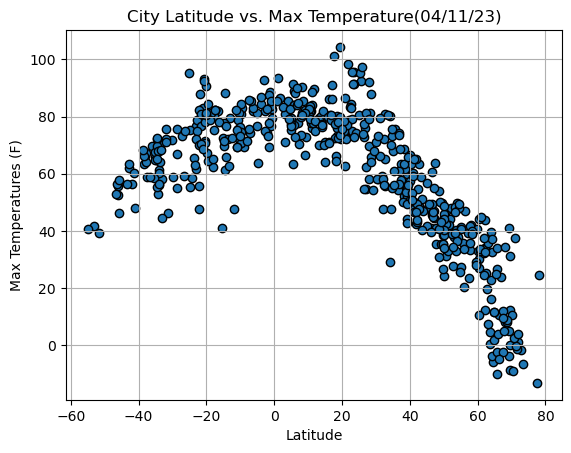

In [23]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps, 
            edgecolors="black", linewidth=1, marker="o", 
            alpha=1, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperatures (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

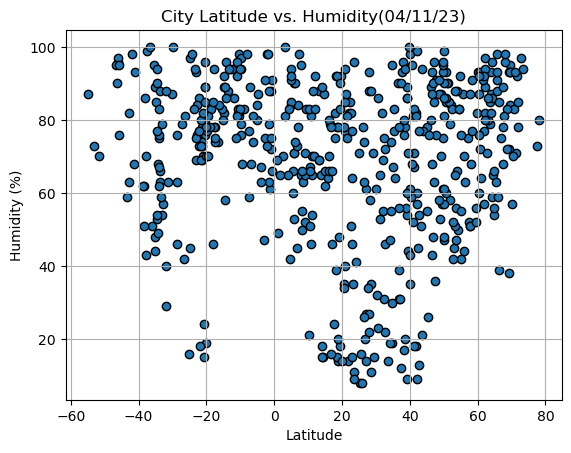

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity, 
            edgecolor="black", linewidth=1, marker="o", 
            alpha=1, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

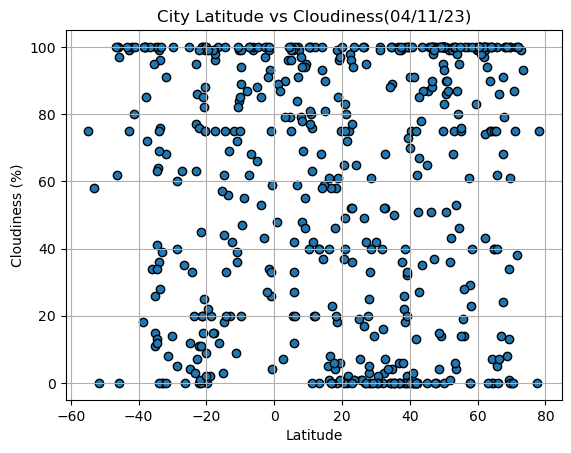

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness, 
            edgecolor="black", linewidth=1, marker="o", 
            alpha=1, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

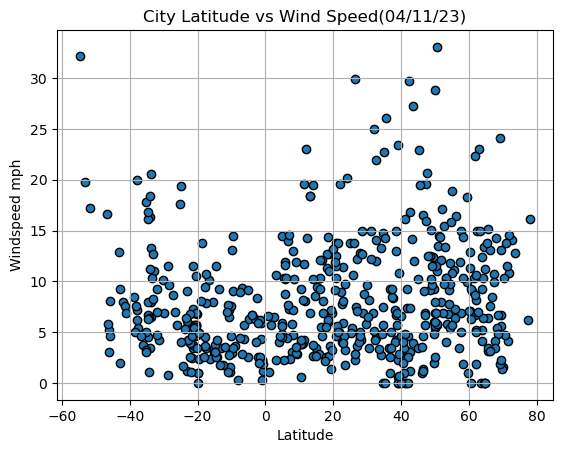

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed, 
            edgecolor="black", linewidth=1, marker="o", 
            alpha=1, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates): 

    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #Plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show


In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,severo-kurilsk,50.6789,156.1250,31.24,85,86,33.08,RU,1681190166
2,san severo,41.6897,15.3760,42.40,82,13,3.15,IT,1681190490
3,dikson,73.5069,80.5464,-6.72,94,93,12.80,RU,1681190723
7,qaanaaq,77.4840,-69.3632,-13.22,73,0,6.24,GL,1681190723
8,kerouane,9.2667,-9.0167,72.81,83,95,2.86,GN,1681190724


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,terra santa,-2.1042,-56.4869,74.14,98,100,2.53,BR,1681190722
4,mar del plata,-38.0023,-57.5575,66.09,86,100,20.00,AR,1681189843
5,vaini,-21.2000,-175.2000,82.56,78,20,11.50,TO,1681190123
6,busselton,-33.6500,115.3333,68.85,63,96,13.29,AU,1681190723
10,rikitea,-23.1203,-134.9692,76.84,69,95,9.04,PF,1681190592


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8973709238809529


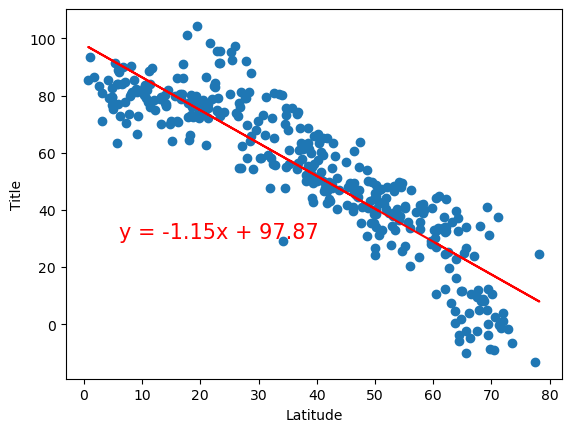

In [30]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (6,30))

The r-squared is: 0.6478921125792952


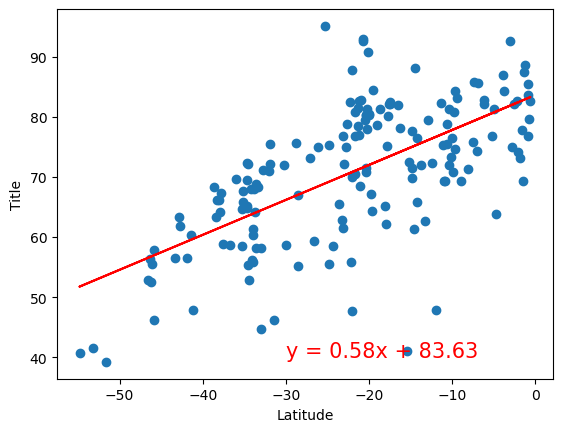

In [31]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-30, 40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.21912741309486458


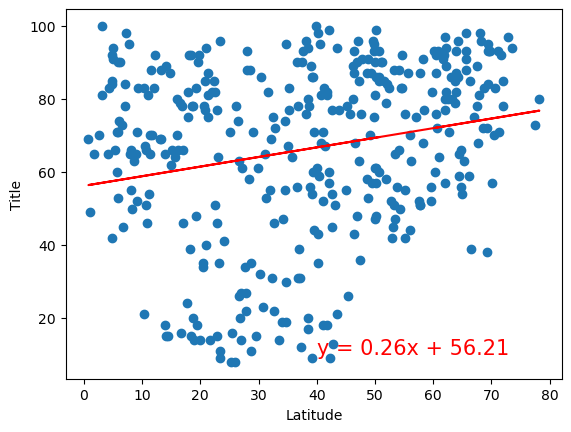

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (40, 10))

The r-squared is: 0.1266819827149883


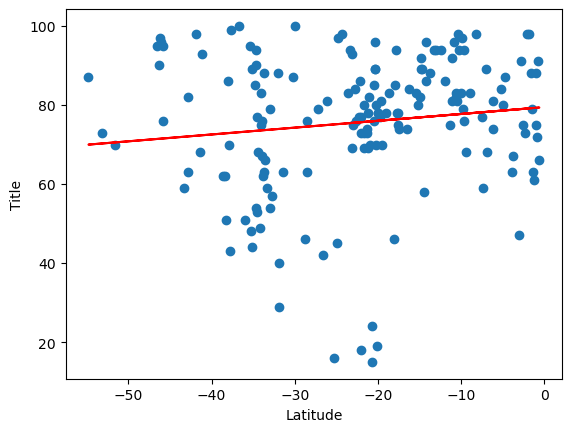

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-30, 150))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.09096001200844621


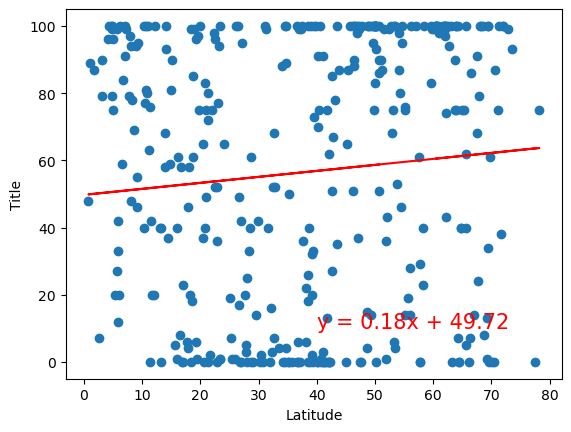

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40, 10))

The r-squared is: 0.042764326839867126


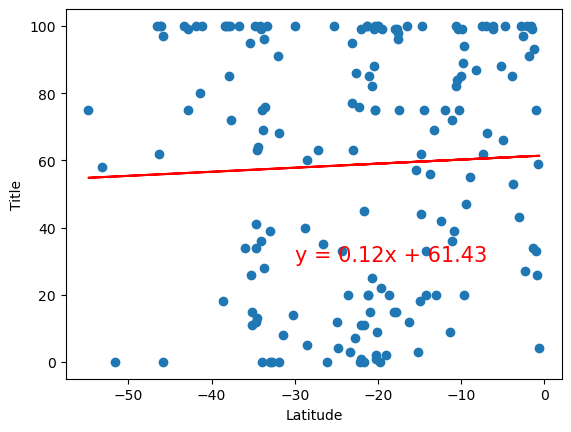

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30, 30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0760186593250556


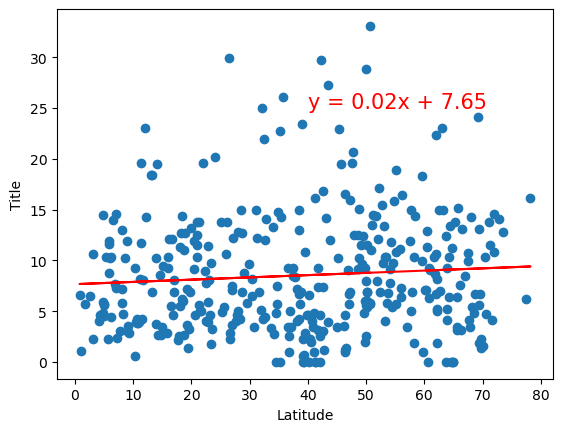

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40, 25))

The r-squared is: -0.42477558594819487


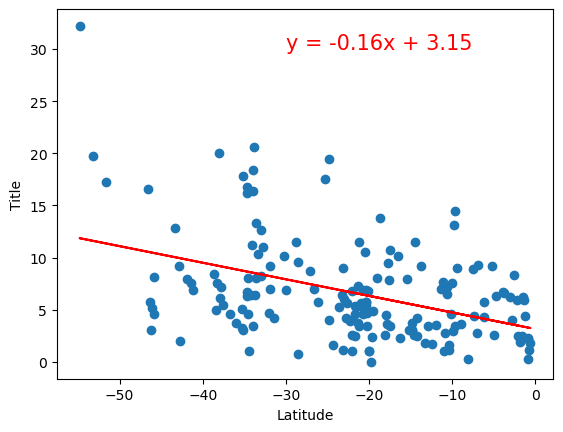

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-30, 30))


**Discussion about the linear relationship:** YOUR RESPONSE HERE